# Data

## Data Selection

Data scraped from *SDOT Traffic Management Division, Traffic Records Group* is provided in **Data-Collisions.csv**.

## Data Understanding

The metadata for the selected data is provided in **Metadata.pdf**.

The data is read to be understood and then prepared.

#### Import Python libraries

In [1]:
import pandas as pd
import numpy as np
# from sklearn import preprocessing
import matplotlib as plt

In [2]:
%matplotlib inline

#### Read data

In [3]:
df = pd.read_csv('Data-Collisions.csv', low_memory=False)

#### Check shape of the data frame

In [4]:
df.shape

(194673, 38)

#### View first five rows of the data frame

In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Attribute requirements

The attributes that we need to build the proposed model are __SEVERITYCODE__, __ROADCOND__, __LIGHTCOND__, and __WEATHER__.

#### Check data type, null and unique values in __SEVERITYCODE__, __ROADCOND__, __LIGHTCOND__, and __WEATHER__.

In [6]:
def inspect_data(_df, col_name):
    print(col_name)
    print('Data type =', _df[col_name].dtype)
    print('Null count =', _df[col_name].isnull().sum())
    print('Unique =', _df[col_name].unique())
    print('')

In [7]:
inspect_data(df, 'SEVERITYCODE')

SEVERITYCODE
Data type = int64
Null count = 0
Unique = [2 1]



In [8]:
inspect_data(df, 'ROADCOND')

ROADCOND
Data type = object
Null count = 5012
Unique = ['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']



In [9]:
inspect_data(df, 'LIGHTCOND')

LIGHTCOND
Data type = object
Null count = 5170
Unique = ['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' nan
 'Unknown' 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']



In [10]:
inspect_data(df, 'WEATHER')

WEATHER
Data type = object
Null count = 5081
Unique = ['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']



## Data Preparation

#### Subset required data

In [11]:
dfs = df[['SEVERITYCODE', 'ROADCOND', 'LIGHTCOND', 'WEATHER']].copy()

In [12]:
dfs.shape

(194673, 4)

In [13]:
dfs.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,2,Wet,Daylight,Overcast
1,1,Wet,Dark - Street Lights On,Raining
2,1,Dry,Daylight,Overcast
3,1,Dry,Daylight,Clear
4,2,Wet,Daylight,Raining


#### Drop rows with NaN values

In [14]:
dfs.dropna(subset=['ROADCOND', 'LIGHTCOND', 'WEATHER'], inplace=True)

In [15]:
dfs.shape

(189337, 4)

#### Check data type, null and unique values in __SEVERITYCODE__, __ROADCOND__, __LIGHTCOND__, and __WEATHER__.

In [16]:
inspect_data(dfs, 'SEVERITYCODE')
inspect_data(dfs, 'ROADCOND')
inspect_data(dfs, 'LIGHTCOND')
inspect_data(dfs, 'WEATHER')

SEVERITYCODE
Data type = int64
Null count = 0
Unique = [2 1]

ROADCOND
Data type = object
Null count = 0
Unique = ['Wet' 'Dry' 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']

LIGHTCOND
Data type = object
Null count = 0
Unique = ['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' 'Unknown'
 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']

WEATHER
Data type = object
Null count = 0
Unique = ['Overcast' 'Raining' 'Clear' 'Unknown' 'Other' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']



#### Use label encoding to convert text attributes to numeric form

In [17]:
# label_encoder = preprocessing.LabelEncoder()
def add_encoded_col(_df, col_name):
    _df[col_name + '_CAT'] = _df[col_name].astype('category').cat.codes
#     _df[col_name + '_CAT'] = label_encoder.fit_transform(_df[col_name])
    print(col_name)
    display(_df[col_name + '_CAT'].unique())
    print()

In [18]:
add_encoded_col(dfs, 'ROADCOND')
add_encoded_col(dfs, 'LIGHTCOND')
add_encoded_col(dfs, 'WEATHER')

ROADCOND


array([8, 0, 7, 5, 1, 3, 4, 6, 2], dtype=int8)


LIGHTCOND


array([5, 2, 0, 8, 6, 4, 1, 7, 3], dtype=int8)


WEATHER


array([ 4,  6,  1, 10,  3,  9,  2,  8,  0,  7,  5], dtype=int8)

In [19]:
dfs.head(15)

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,ROADCOND_CAT,LIGHTCOND_CAT,WEATHER_CAT
0,2,Wet,Daylight,Overcast,8,5,4
1,1,Wet,Dark - Street Lights On,Raining,8,2,6
2,1,Dry,Daylight,Overcast,0,5,4
3,1,Dry,Daylight,Clear,0,5,1
4,2,Wet,Daylight,Raining,8,5,6
5,1,Dry,Daylight,Clear,0,5,1
6,1,Wet,Daylight,Raining,8,5,6
7,2,Dry,Daylight,Clear,0,5,1
8,1,Dry,Daylight,Clear,0,5,1
9,2,Dry,Daylight,Clear,0,5,1


#### Check for sample balance in __SEVERITYCODE__

In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28    
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

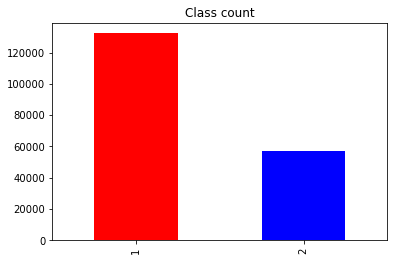

In [20]:
vc = dfs['SEVERITYCODE'].value_counts()
display(vc)
vc.plot(kind='bar', x='SEVERITYCODE', title='Class count', color=['r', 'b']);

We observe that serverity '2' has lesser samples than '1'. Hence, we downsample rows with severity '1' to balance both the classes.

#### Randomly remove excess rows with __SEVERITYCODE__ 1

In [21]:
excess = vc[1] - vc[2]
drop_idx = np.random.choice(dfs[dfs['SEVERITYCODE'] == 1].index, excess, replace=False)
dfsr = dfs.drop(drop_idx).copy()

2    57052
1    57052
Name: SEVERITYCODE, dtype: int64

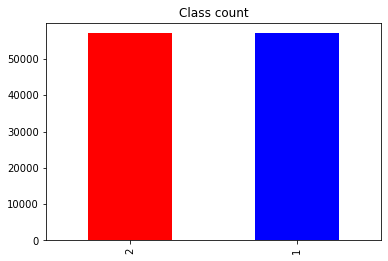

In [22]:
vc2 = dfsr['SEVERITYCODE'].value_counts()
display(vc2)
vc2.plot(kind='bar', x='SEVERITYCODE', title='Class count', color=['r', 'b']);

In [23]:
dfsr.reset_index(drop=True, inplace=True)

In [24]:
dfsr.head(15)

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,ROADCOND_CAT,LIGHTCOND_CAT,WEATHER_CAT
0,2,Wet,Daylight,Overcast,8,5,4
1,1,Wet,Dark - Street Lights On,Raining,8,2,6
2,1,Dry,Daylight,Clear,0,5,1
3,2,Wet,Daylight,Raining,8,5,6
4,2,Dry,Daylight,Clear,0,5,1
5,2,Dry,Daylight,Clear,0,5,1
6,1,Wet,Dark - Street Lights On,Raining,8,2,6
7,2,Dry,Dark - Street Lights On,Clear,0,2,1
8,2,Dry,Daylight,Overcast,0,5,4
9,2,Dry,Daylight,Clear,0,5,1


Now the data is ready for modelling.